# HDB Resale Price Prediction

## Exploratory Data Analysis

### Import Libraries

In [4]:
# General
import re
import math
import numpy as np
import pandas as pd

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
colour_palette = sns.color_palette("hls", 8)

# Statistics
from scipy.stats import kurtosis, skew

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [6]:
# Importing Data
data_hdb_last15 = pd.read_csv('../dataset/hdb_last15_merged.csv')
data_hdb_last15.index += 1
data_hdb_last15

,town,flat_type,flat_model,floor_area_sqm,resale_price,month,lease_commence_date,storey_range,block,remaining_lease,...,recreational_within_1km_count,recreational_within_1km_average_rating,recreational_within_2km_count,recreational_within_2km_average_rating,education_within_1km_count,education_within_1km_average_rating,education_within_2km_count,education_within_2km_average_rating,postal_code,region
1,SEMBAWANG,5 ROOM,Premium Apartment,111.0,362000.0,2009-07-01,2001-01-01,04 TO 06,357A,91.000000,...,3.0,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357,North
2,SEMBAWANG,5 ROOM,Premium Apartment,110.0,370000.0,2009-08-01,2001-01-01,07 TO 09,357A,91.000000,...,3.0,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357,North
3,SEMBAWANG,5 ROOM,Premium Apartment,110.0,403000.0,2010-01-01,2001-01-01,16 TO 18,357A,90.000000,...,3.0,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357,North
4,SEMBAWANG,4 ROOM,Premium Apartment,95.0,350000.0,2010-07-01,2001-01-01,01 TO 03,357A,90.000000,...,3.0,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357,North
5,SEMBAWANG,4 ROOM,Premium Apartment,95.0,399000.0,2010-07-01,2001-01-01,10 TO 12,357A,90.000000,...,3.0,3.733333,6.0,3.916667,4.0,4.275,8.0,4.250,751357,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325966,BUKIT MERAH,5 ROOM,Improved,114.0,921000.0,2022-10-01,1974-01-01,13 TO 15,87,50.750000,...,7.0,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087,South
325967,BUKIT MERAH,5 ROOM,Improved,117.0,930000.0,2022-10-01,1974-01-01,04 TO 06,87,50.750000,...,7.0,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087,South
325968,BUKIT MERAH,5 ROOM,Improved,117.0,978000.0,2022-12-01,1974-01-01,13 TO 15,87,50.666667,...,7.0,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087,South
325969,BUKIT MERAH,5 ROOM,Improved,114.0,950000.0,2022-12-01,1974-01-01,22 TO 24,87,50.583333,...,7.0,4.057143,78.0,4.052564,3.0,2.700,25.0,3.348,160087,South


In [7]:
# Convert date values to datatime object
data_hdb_last15['lease_commence_date'] = pd.to_datetime(data_hdb_last15['lease_commence_date'], format='%Y-%m-%d')
data_hdb_last15['month'] = pd.to_datetime(data_hdb_last15['month'], format='%Y-%m-%d')

In [8]:
# Understanding Data II
data_hdb_last15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325970 entries, 1 to 325970
Data columns (total 34 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   town                                    325970 non-null  object        
 1   flat_type                               325970 non-null  object        
 2   flat_model                              325970 non-null  object        
 3   floor_area_sqm                          325970 non-null  float64       
 4   resale_price                            325970 non-null  float64       
 5   month                                   325970 non-null  datetime64[ns]
 6   lease_commence_date                     325970 non-null  datetime64[ns]
 7   storey_range                            325970 non-null  object        
 8   block                                   325970 non-null  object        
 9   remaining_lease                      

In [9]:
# Understanding Data III
data_hdb_last15.describe()

,floor_area_sqm,resale_price,month,lease_commence_date,remaining_lease,lat,long,nearest_distance_to_mrt,avg_long,avg_lat,...,healthcare_within_2km_count,healthcare_within_2km_average_rating,recreational_within_1km_count,recreational_within_1km_average_rating,recreational_within_2km_count,recreational_within_2km_average_rating,education_within_1km_count,education_within_1km_average_rating,education_within_2km_count,education_within_2km_average_rating
count,325970.000000,3.259700e+05,325970,325970,325970.000000,325970.000000,325970.000000,325970.000000,325970.000000,325970.000000,...,325970.000000,325970.000000,325970.000000,325970.000000,325970.00000,325970.000000,325970.000000,325970.000000,325970.000000,325970.000000
mean,97.298113,4.432090e+05,2015-12-03 22:38:55.444366080,1992-04-28 22:43:20.499432704,75.815612,1.366200,103.839054,0.621817,103.839054,1.366200,...,20.319523,2.559364,3.816459,3.929399,11.85914,4.056296,4.849373,4.029572,14.404427,4.094919
min,31.000000,1.270000e+05,2009-01-01 00:00:00,1966-01-01 00:00:00,43.000000,1.270380,103.644248,0.023000,103.688247,1.272255,...,1.000000,0.800000,0.000000,0.000000,2.00000,3.577778,0.000000,0.000000,1.000000,2.786667
25%,75.000000,3.380000e+05,2011-09-01 00:00:00,1984-01-01 00:00:00,66.416667,1.336294,103.774678,0.332000,103.774336,1.336320,...,10.000000,2.285714,2.000000,3.933333,8.00000,3.985714,3.000000,3.975000,12.000000,3.994737
50%,95.000000,4.150000e+05,2016-02-01 00:00:00,1990-01-01 00:00:00,75.166667,1.363484,103.844465,0.549000,103.844993,1.364061,...,16.000000,2.550000,3.000000,4.050000,10.00000,4.075000,5.000000,4.133333,14.000000,4.128571
75%,113.000000,5.160000e+05,2020-01-01 00:00:00,2001-01-01 00:00:00,86.000000,1.393174,103.898485,0.826000,103.898503,1.391891,...,22.000000,2.800000,5.000000,4.150000,13.00000,4.137500,6.000000,4.266667,17.000000,4.205263
max,280.000000,1.418000e+06,2023-01-01 00:00:00,2019-01-01 00:00:00,100.000000,1.457071,103.987463,3.666000,103.986786,1.455540,...,196.000000,4.900000,41.000000,4.700000,105.00000,4.400000,19.000000,5.000000,37.000000,4.700000
std,24.554510,1.472558e+05,NaN,NaN,11.976678,0.042893,0.072565,0.382305,0.072451,0.042830,...,19.784455,0.602754,3.030277,0.687653,8.59500,0.133953,2.259039,0.599321,4.704222,0.184136


### Data Exploration

#### Categorical Variables

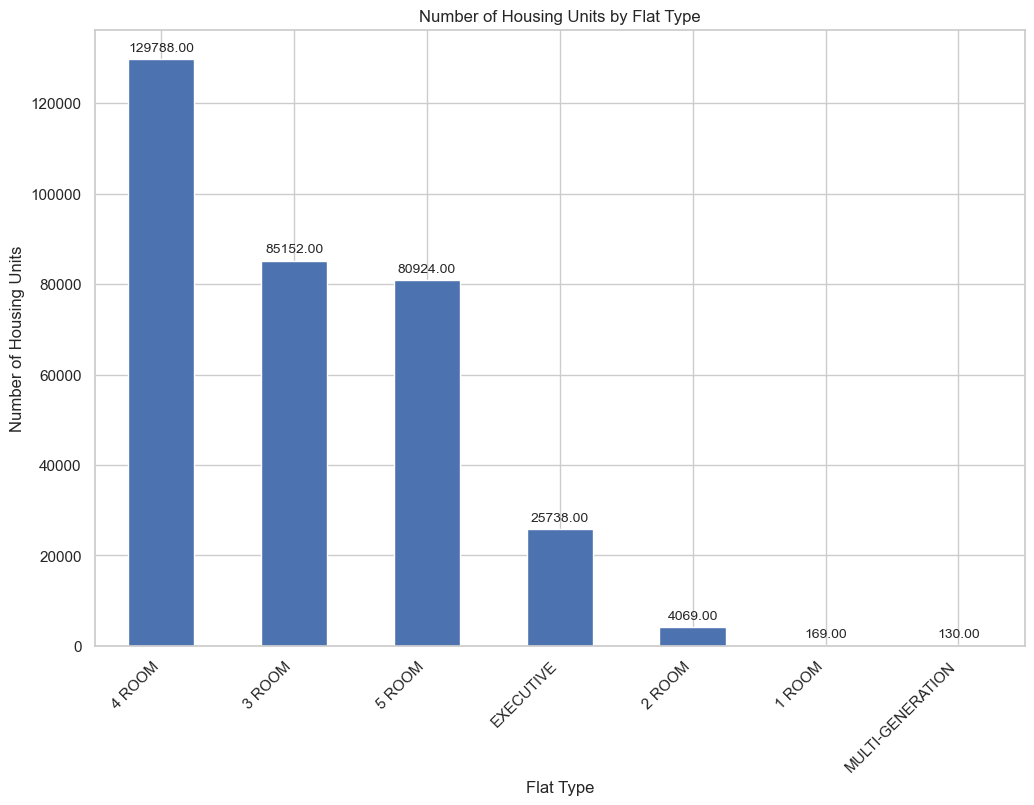

In [10]:
# bar chart for flat_type

# count the occurrences of each flat_type
flat_type_counts = data_hdb_last15['flat_type'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
plot = flat_type_counts.plot(kind='bar')
plt.title('Number of Housing Units by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Number of Housing Units')
plt.xticks(rotation=45, ha='right')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.show()

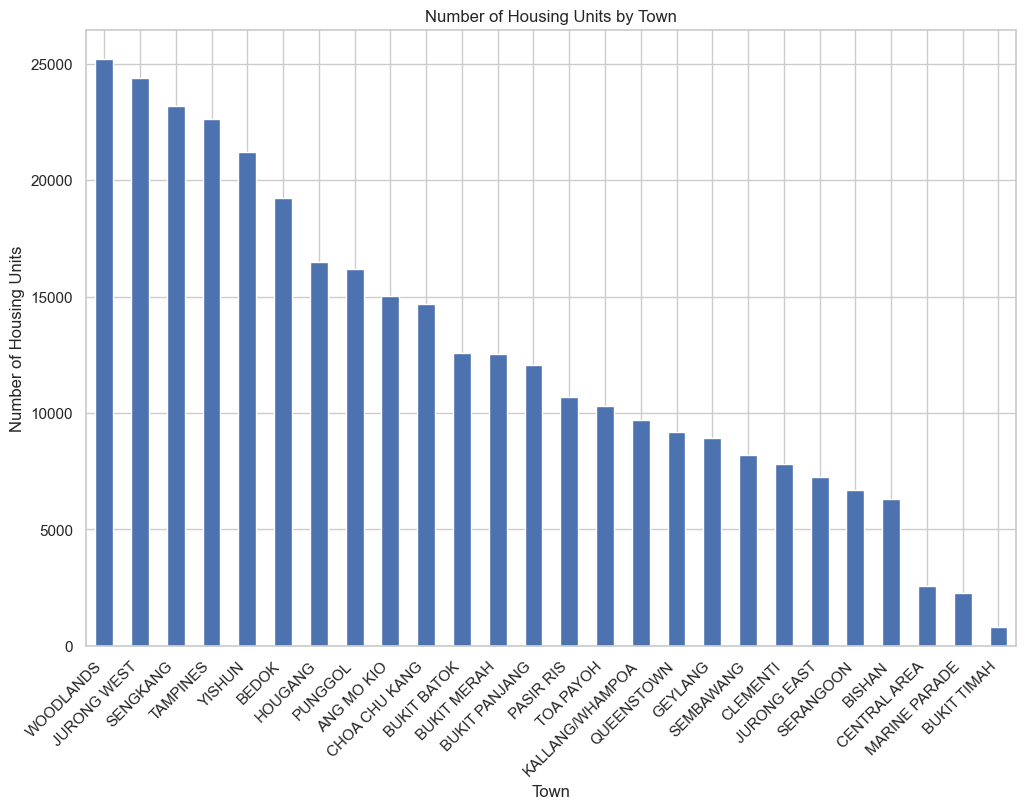

In [14]:
# bar chart for town

# count the occurrences of each town
town_counts = data_hdb_last15['town'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
town_counts.plot(kind='bar')
plt.title('Number of Housing Units by Town')
plt.xlabel('Town')
plt.ylabel('Number of Housing Units')
plt.xticks(rotation=45, ha='right')
plt.show()

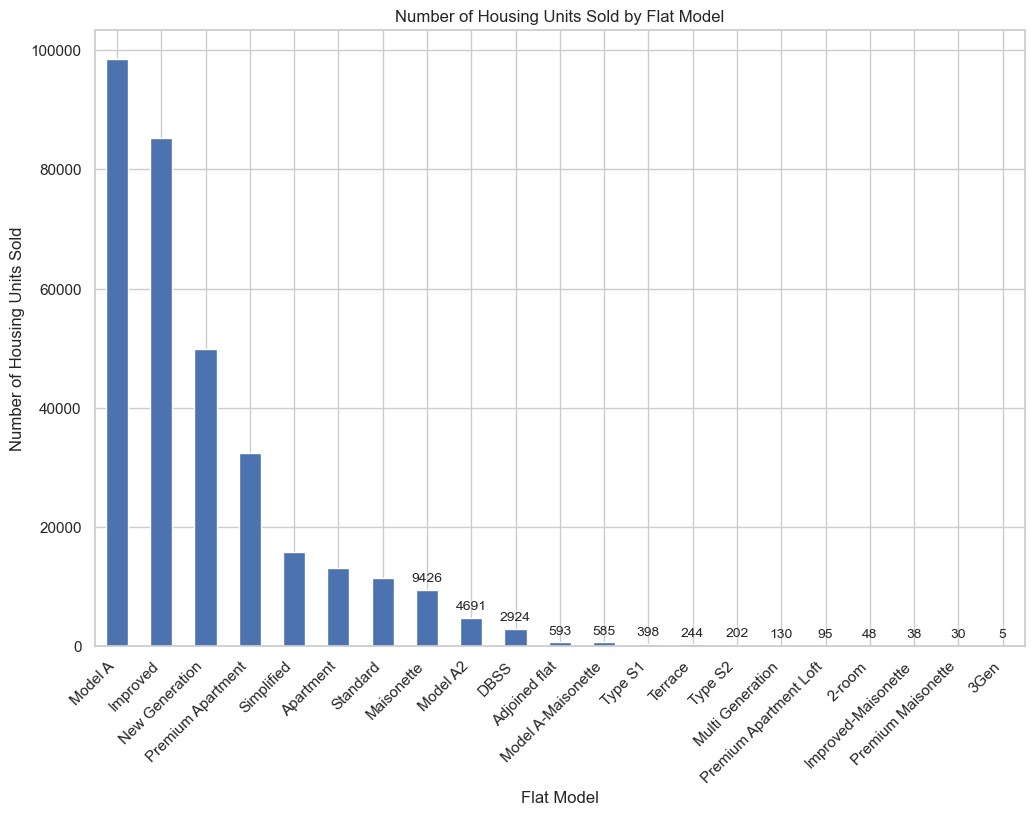

In [15]:
# bar chart for flat model

# count the occurrences of each flat_model
flat_model_counts = data_hdb_last15['flat_model'].value_counts()

# size
plt.figure(figsize=(12, 8))

# sort
flat_model_counts = flat_model_counts.sort_values(ascending=False)

# plot
plot = flat_model_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')

for bar in plot.patches:
    if (bar.get_height() < 10000):
        plot.annotate(format(bar.get_height(),), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    
plt.show()

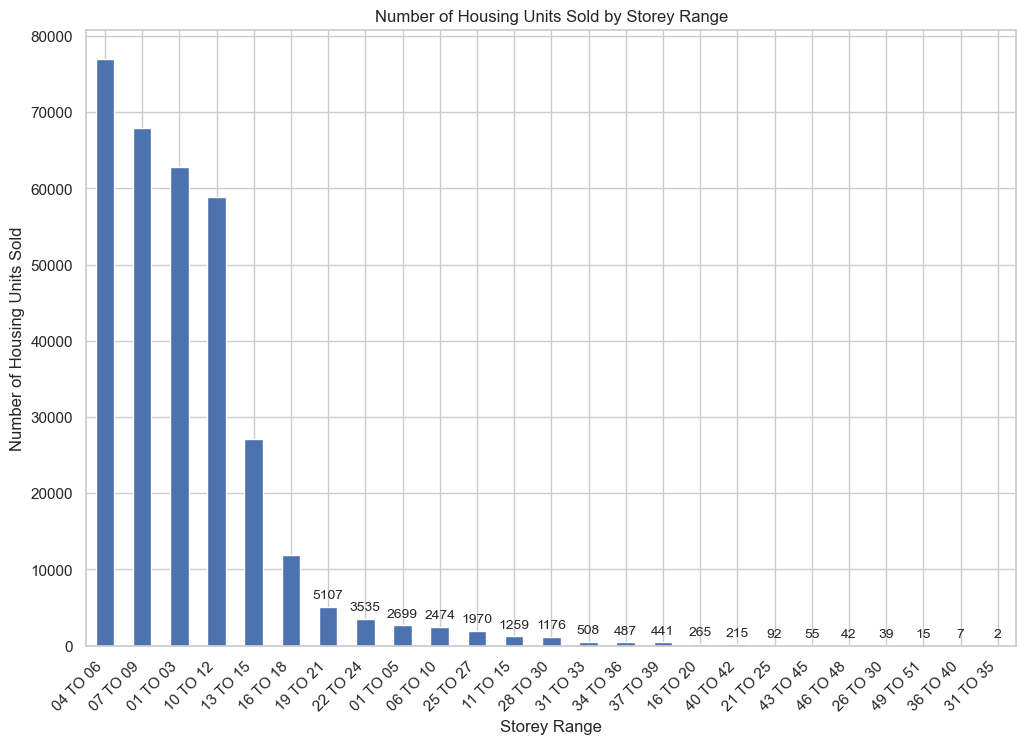

In [16]:
# bar chart for storey_range

# count the occurrences of each storey_range
story_counts = data_hdb_last15['storey_range'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
plot = story_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Storey Range')
plt.xlabel('Storey Range')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')

for bar in plot.patches:
    if (bar.get_height() < 10000):
        plot.annotate(format(bar.get_height(),), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

plt.show()

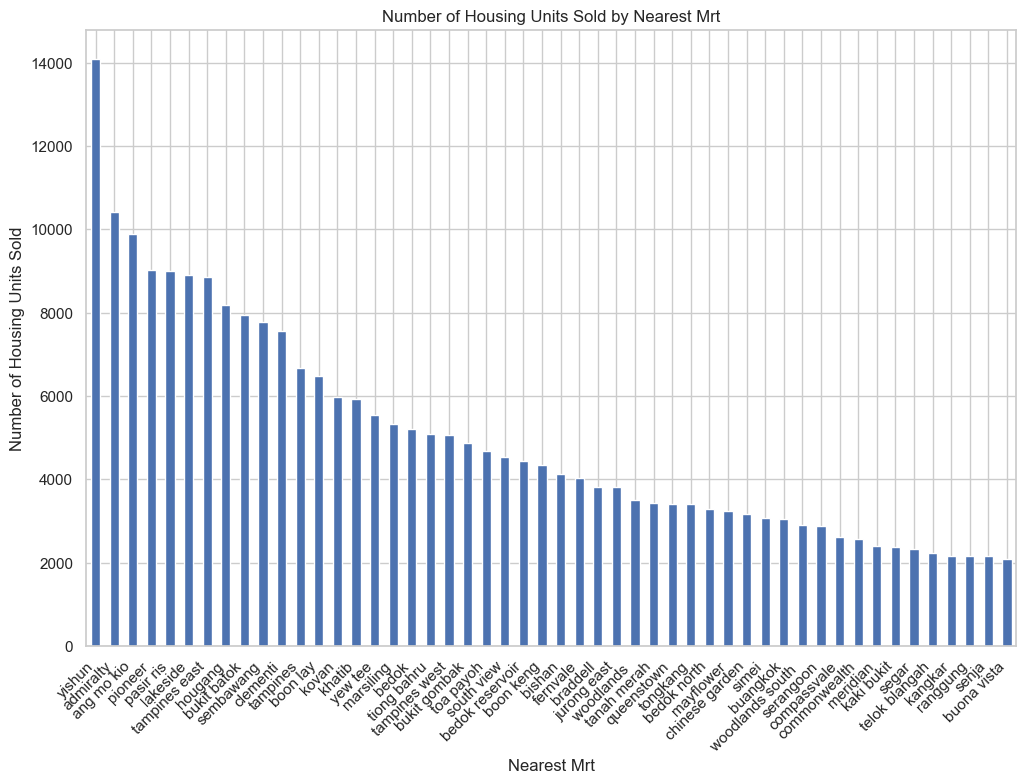

In [17]:
# bar chart for nearest_mrt

# count the occurrences for each mrt, filter top 50 as there are too many
nearest_mrt_counts = data_hdb_last15['nearest_mrt'].value_counts().head(50)

# size
plt.figure(figsize=(12, 8))

# plot
nearest_mrt_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Nearest Mrt')
plt.xlabel('Nearest Mrt')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Numerical Variables

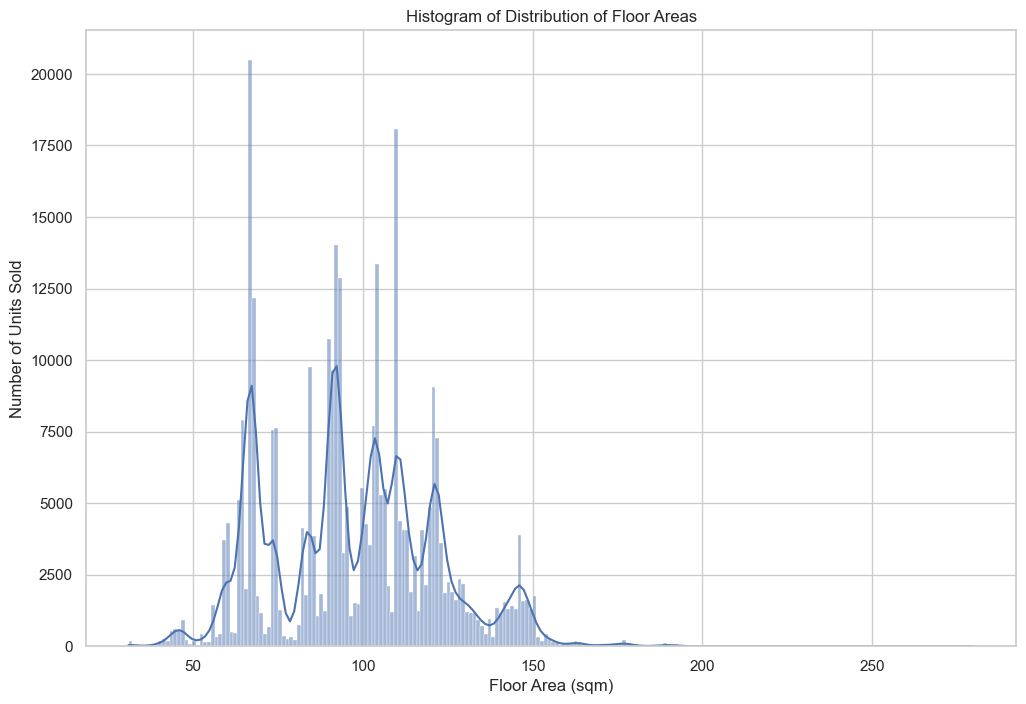

In [18]:
# histogram for floor area

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_last15['floor_area_sqm'], kde=True)
plt.title('Histogram of Distribution of Floor Areas')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Number of Units Sold')
plt.show()

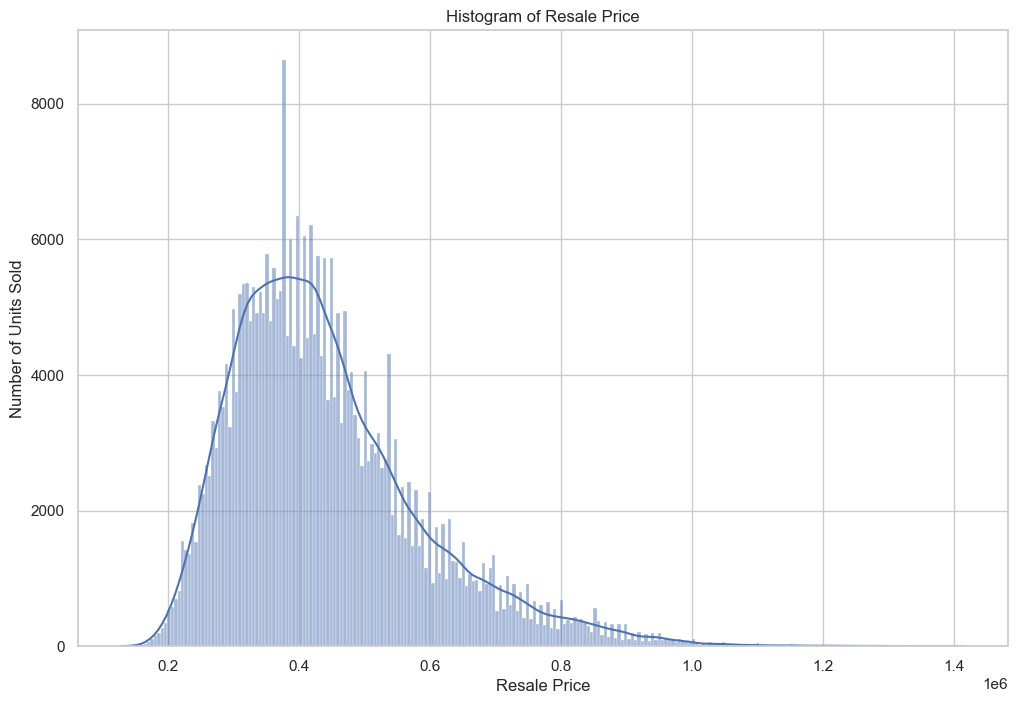

In [19]:
# histogram for resale_price

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_last15['resale_price'], kde=True)
plt.title('Histogram of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Number of Units Sold')
plt.show()

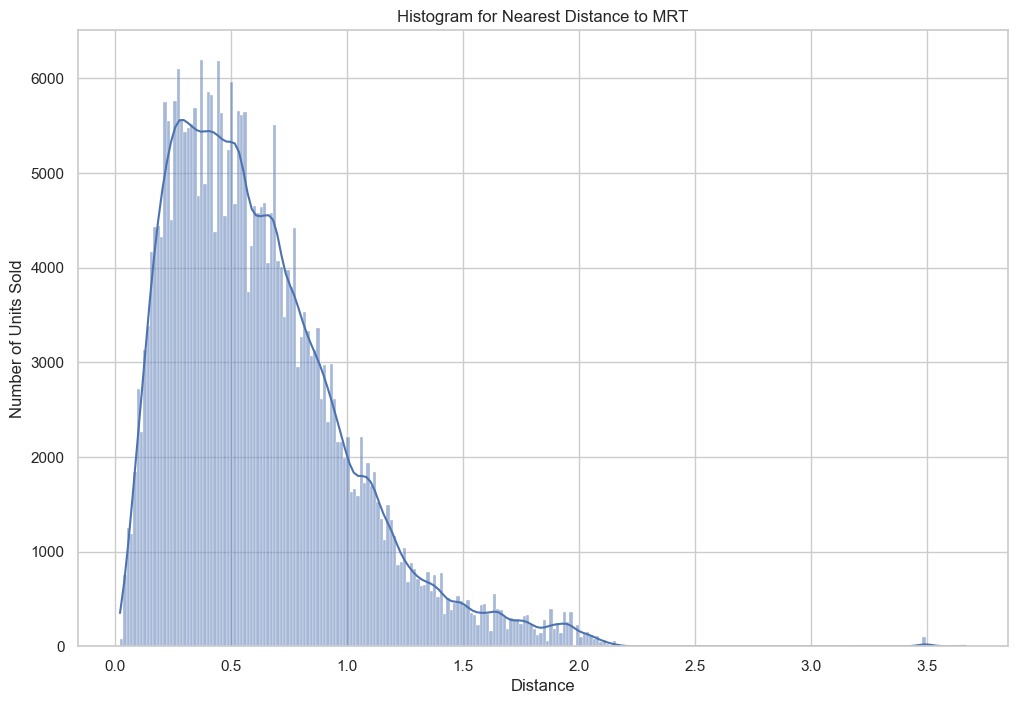

In [20]:
# histogram for nearest_distance_to_mrt

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_last15['nearest_distance_to_mrt'], kde=True)
plt.title('Histogram for Nearest Distance to MRT')
plt.xlabel('Distance')
plt.ylabel('Number of Units Sold')
plt.show()

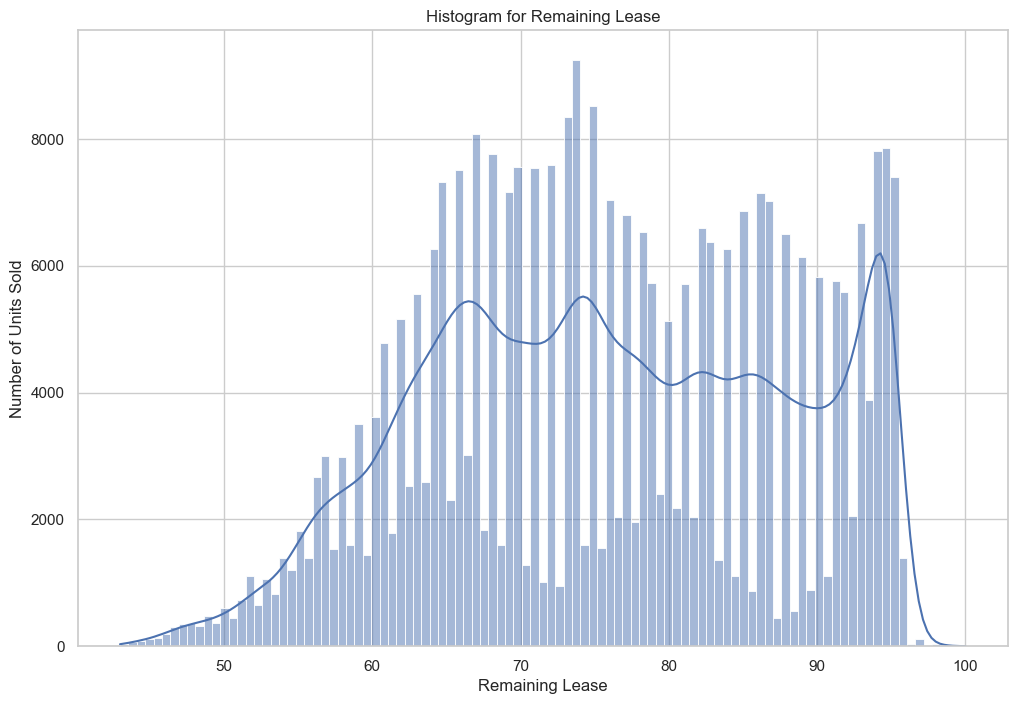

In [21]:
# histogram for remaining_lease

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_last15['remaining_lease'], kde=True)
plt.title('Histogram for Remaining Lease')
plt.xlabel('Remaining Lease')
plt.ylabel('Number of Units Sold')
plt.show()

#### Time-Series

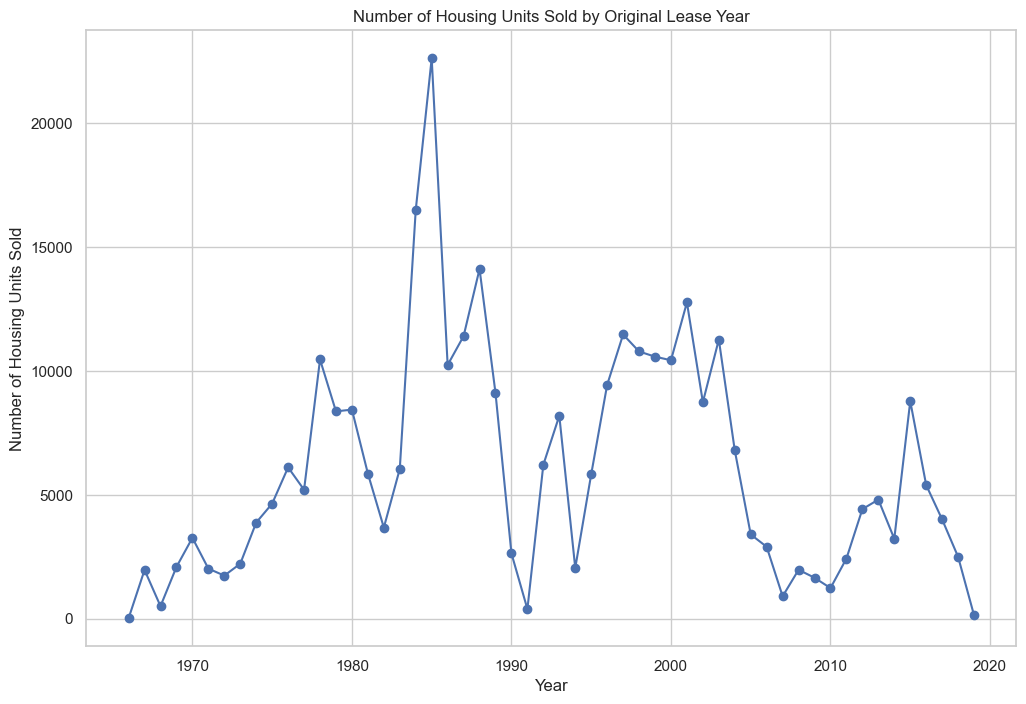

In [22]:
# time series chart for lease_commence_date

# count the occurrences of each lease_commence_date (year)
year_counts = data_hdb_last15['lease_commence_date'].dt.year.value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
year_counts.plot(kind='line', marker='o')
plt.title('Number of Housing Units Sold by Original Lease Year')
plt.xlabel('Year')
plt.ylabel('Number of Housing Units Sold')
# plt.xlim('1965', '2020')
# plt.xlim(year_counts.index.min(), year_counts.index.max())
plt.show()

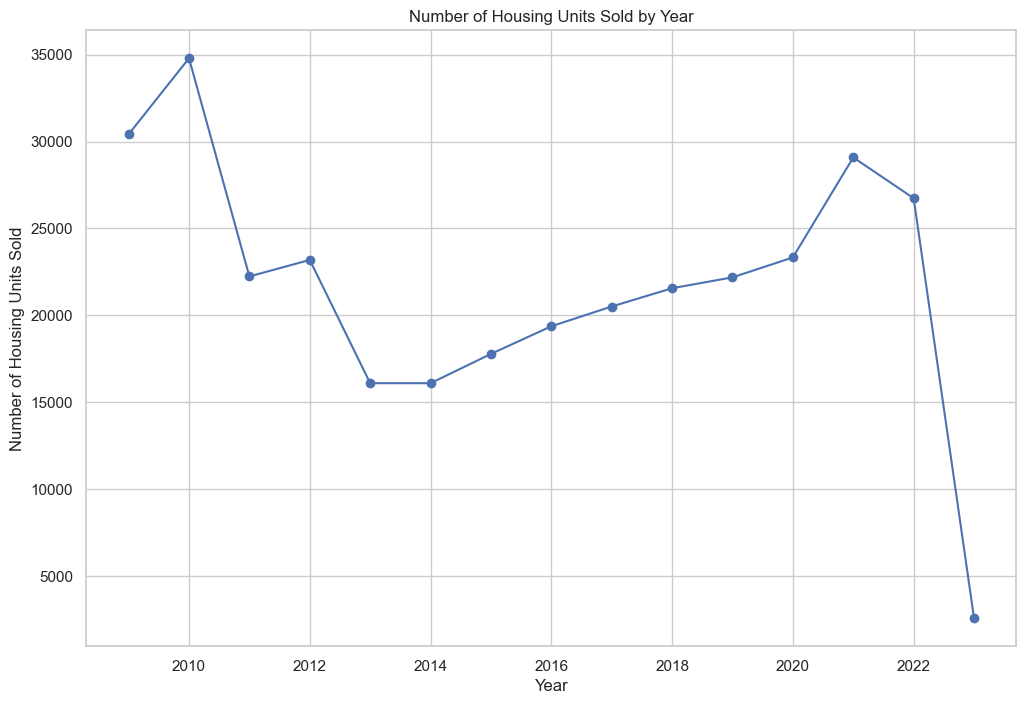

In [23]:
# time series chart for month

# count the occurrences of each month (year)
year_counts = data_hdb_last15['month'].dt.year.value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
year_counts.plot(kind='line', marker='o')
plt.title('Number of Housing Units Sold by Year')
plt.xlabel('Year')
plt.ylabel('Number of Housing Units Sold')
# plt.xlim('2008', '2024')
plt.show()

### Outlier Analysis

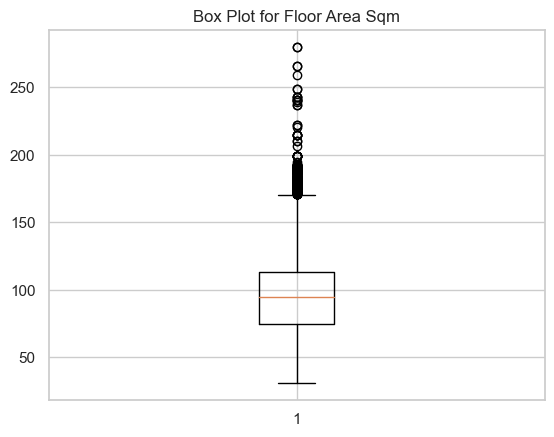

Skewness: 0.267095460611955
Kurtosis: -0.20707553621976604


In [24]:
# floor_area_sqm 

# box plot
plt.title('Box Plot for Floor Area Sqm')
plt.boxplot(data_hdb_last15['floor_area_sqm'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['floor_area_sqm'])
kurt = kurtosis(data_hdb_last15['floor_area_sqm'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


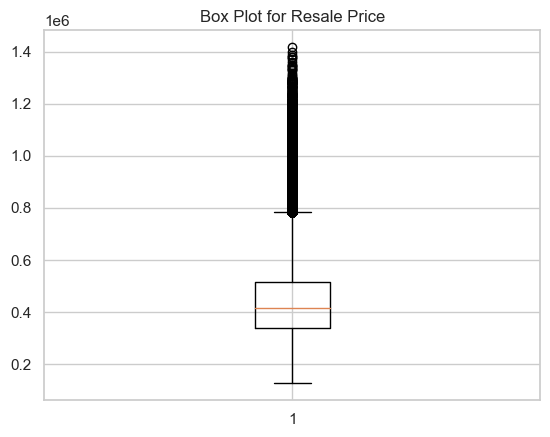

Skewness: 1.1336240445853332
Kurtosis: 1.6984390327605183


In [25]:
# resale price

# box plot
plt.title('Box Plot for Resale Price')
plt.boxplot(data_hdb_last15['resale_price'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['resale_price'])
kurt = kurtosis(data_hdb_last15['resale_price'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

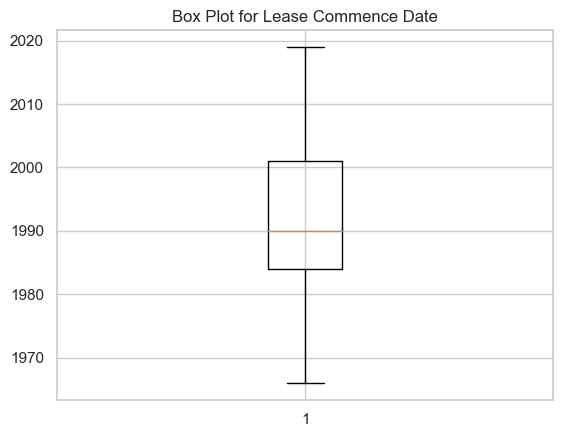

Skewness: 0.23726480066867836
Kurtosis: -0.7236042846328319


In [26]:
# lease_commence_date
data_hdb_last15['lease_commence_date'] = data_hdb_last15['lease_commence_date'].dt.year.astype(int)

# box plot
plt.title('Box Plot for Lease Commence Date')
plt.boxplot(data_hdb_last15['lease_commence_date'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['lease_commence_date'])
kurt = kurtosis(data_hdb_last15['lease_commence_date'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

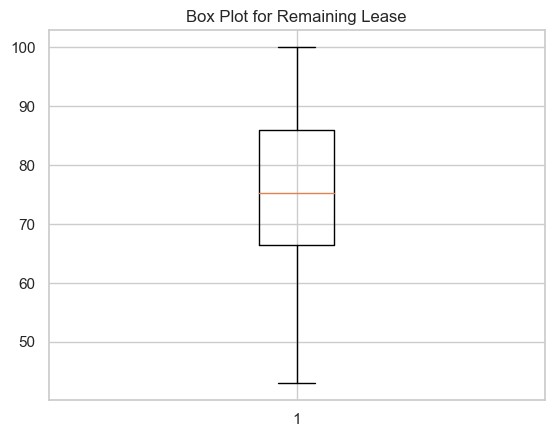

Skewness: -0.09092697341586135
Kurtosis: -0.9197677196013823


In [27]:
# remaining_lease

# box plot
plt.title('Box Plot for Remaining Lease')
plt.boxplot(data_hdb_last15['remaining_lease'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['remaining_lease'])
kurt = kurtosis(data_hdb_last15['remaining_lease'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

In [30]:
# given that hdb flats are sold on 99-year leases, and have a minimum of 5 years of mop
# more investigation needs to be made on why there are resale flats sold with remaining lease > 94 years

sold_within_5yrs = (data_hdb_last15['remaining_lease'] > 94).sum()
total_sold = len(data_hdb_last15)

print("Total number of resale flats sold within first 5 years of purchase: ", sold_within_5yrs)
print("Ratio of resale flats sold within 5 years over total sold: ", sold_within_5yrs / total_sold)

# drop outliers that are less than 5 years of mop
data_hdb_last15 = data_hdb_last15[data_hdb_last15['remaining_lease'] < 95]

Total number of resale flats sold within first 5 years of purchase:  19275
Ratio of resale flats sold within 5 years over total sold:  0.059131208393410434


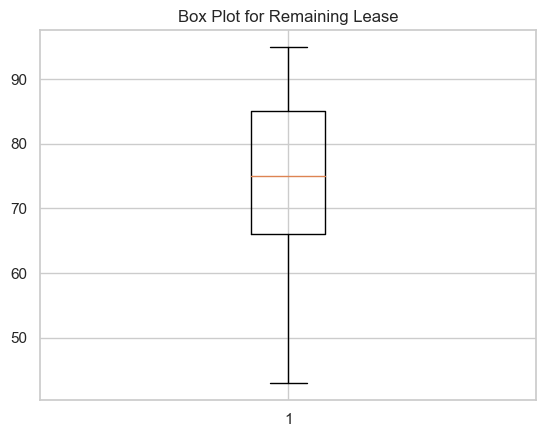

Skewness: -0.0897044707477687
Kurtosis: -0.8852590132924285


In [31]:
# remaining_lease after dropping outliers

# box plot
plt.title('Box Plot for Remaining Lease')
plt.boxplot(data_hdb_last15['remaining_lease'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['remaining_lease'])
kurt = kurtosis(data_hdb_last15['remaining_lease'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

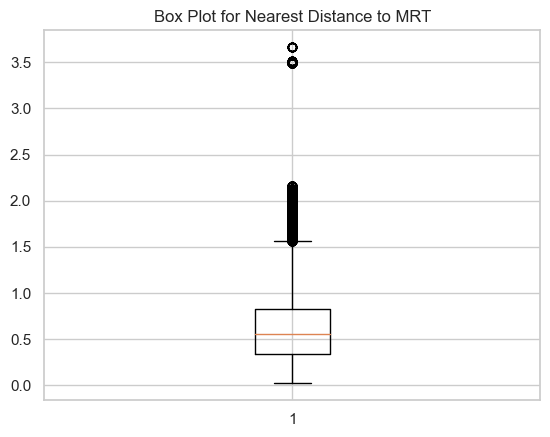

Skewness: 1.1893489000305455
Kurtosis: 2.286329242014004


In [32]:
# nearest_distance_to_mrt

# box plot
plt.title('Box Plot for Nearest Distance to MRT')
plt.boxplot(data_hdb_last15['nearest_distance_to_mrt'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['nearest_distance_to_mrt'])
kurt = kurtosis(data_hdb_last15['nearest_distance_to_mrt'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

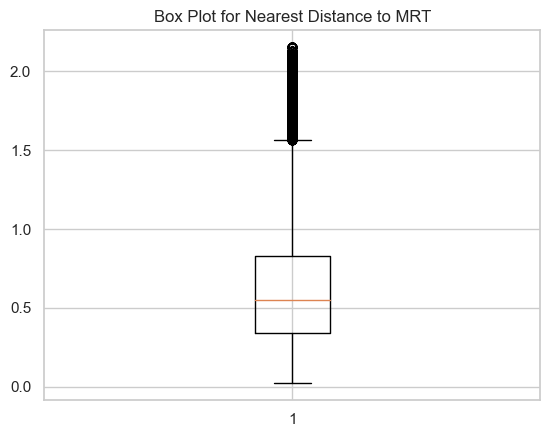

Skewness: 1.0645509268348963
Kurtosis: 1.2041061924086565


In [33]:
# nearest_distance_to_mrt after dropping outliers

# drop outliers
data_hdb_last15 = data_hdb_last15[data_hdb_last15['nearest_distance_to_mrt'] < 2.5]

# box plot
plt.title('Box Plot for Nearest Distance to MRT')
plt.boxplot(data_hdb_last15['nearest_distance_to_mrt'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['nearest_distance_to_mrt'])
kurt = kurtosis(data_hdb_last15['nearest_distance_to_mrt'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

### Correlation Analysis

                resale_price  floor_area_sqm
resale_price        1.000000        0.624732
floor_area_sqm      0.624732        1.000000


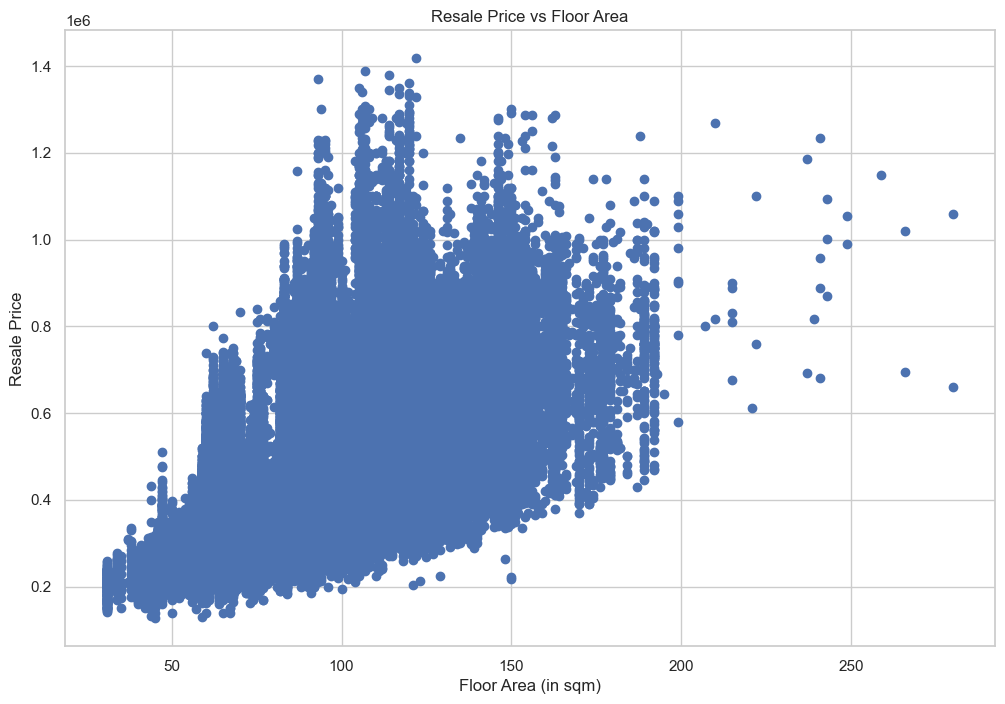

In [34]:
# Finding Correlation between Numerical Features

# resale price vs floor area 
# correlation coefficient
print(data_hdb_last15[['resale_price','floor_area_sqm']].corr())

# scatterplot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_last15['floor_area_sqm'], data_hdb_last15['resale_price'])
plt.xlabel('Floor Area (in sqm)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Floor Area')
plt.show()

                         resale_price  nearest_distance_to_mrt
resale_price                 1.000000                -0.094699
nearest_distance_to_mrt     -0.094699                 1.000000


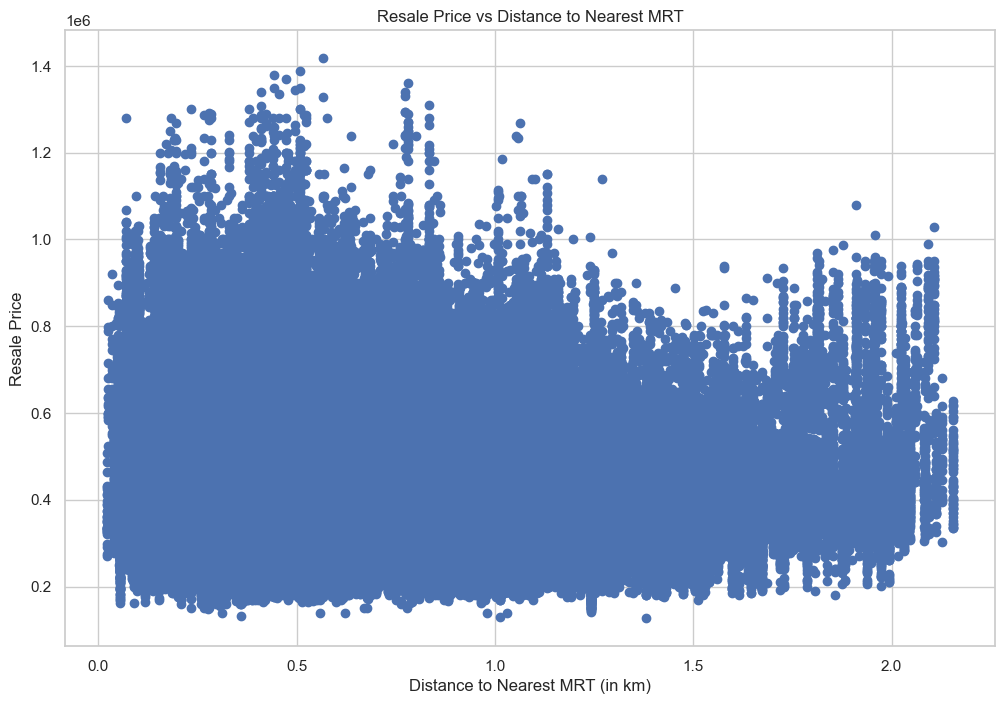

In [35]:
# resale price vs nearest distance to mrt
# correlation coefficient
print(data_hdb_last15[['resale_price','nearest_distance_to_mrt']].corr())

# scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_last15['nearest_distance_to_mrt'], data_hdb_last15['resale_price'])
plt.xlabel('Distance to Nearest MRT (in km)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Distance to Nearest MRT')
plt.show()

                 resale_price  remaining_lease
resale_price         1.000000         0.296156
remaining_lease      0.296156         1.000000


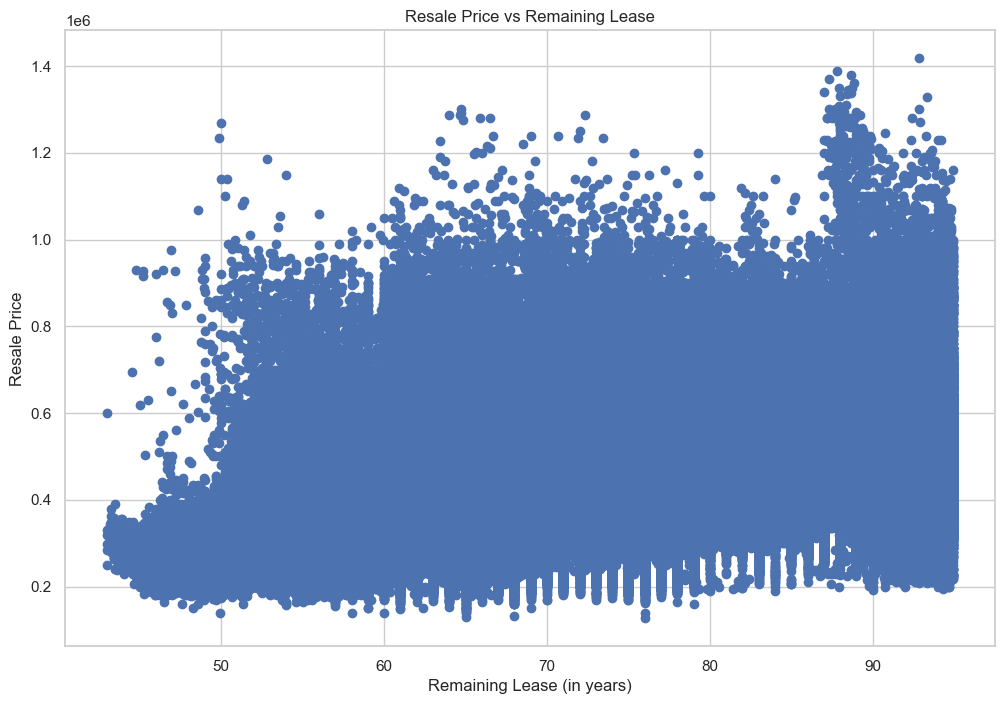

In [36]:
# resale price vs remaiing lease
# correlation coefficient
print(data_hdb_last15[['resale_price','remaining_lease']].corr())

# scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_last15['remaining_lease'], data_hdb_last15['resale_price'])
plt.xlabel('Remaining Lease (in years)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Remaining Lease')
plt.show()

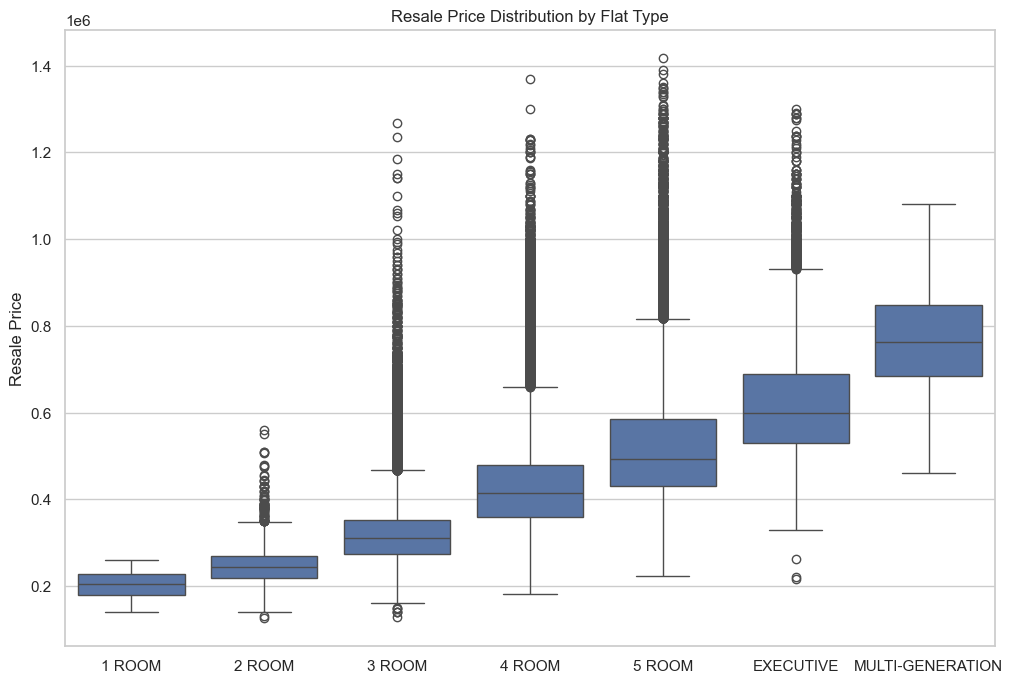

In [37]:
# Relationship between Categorical Features

# flat type vs resale price

order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

plt.figure(figsize=(12, 8))
sns.boxplot(x='flat_type', y='resale_price', data=data_hdb_last15, order=order)
plt.xlabel('')
plt.ylabel('Resale Price')
plt.title('Resale Price Distribution by Flat Type')
plt.show()

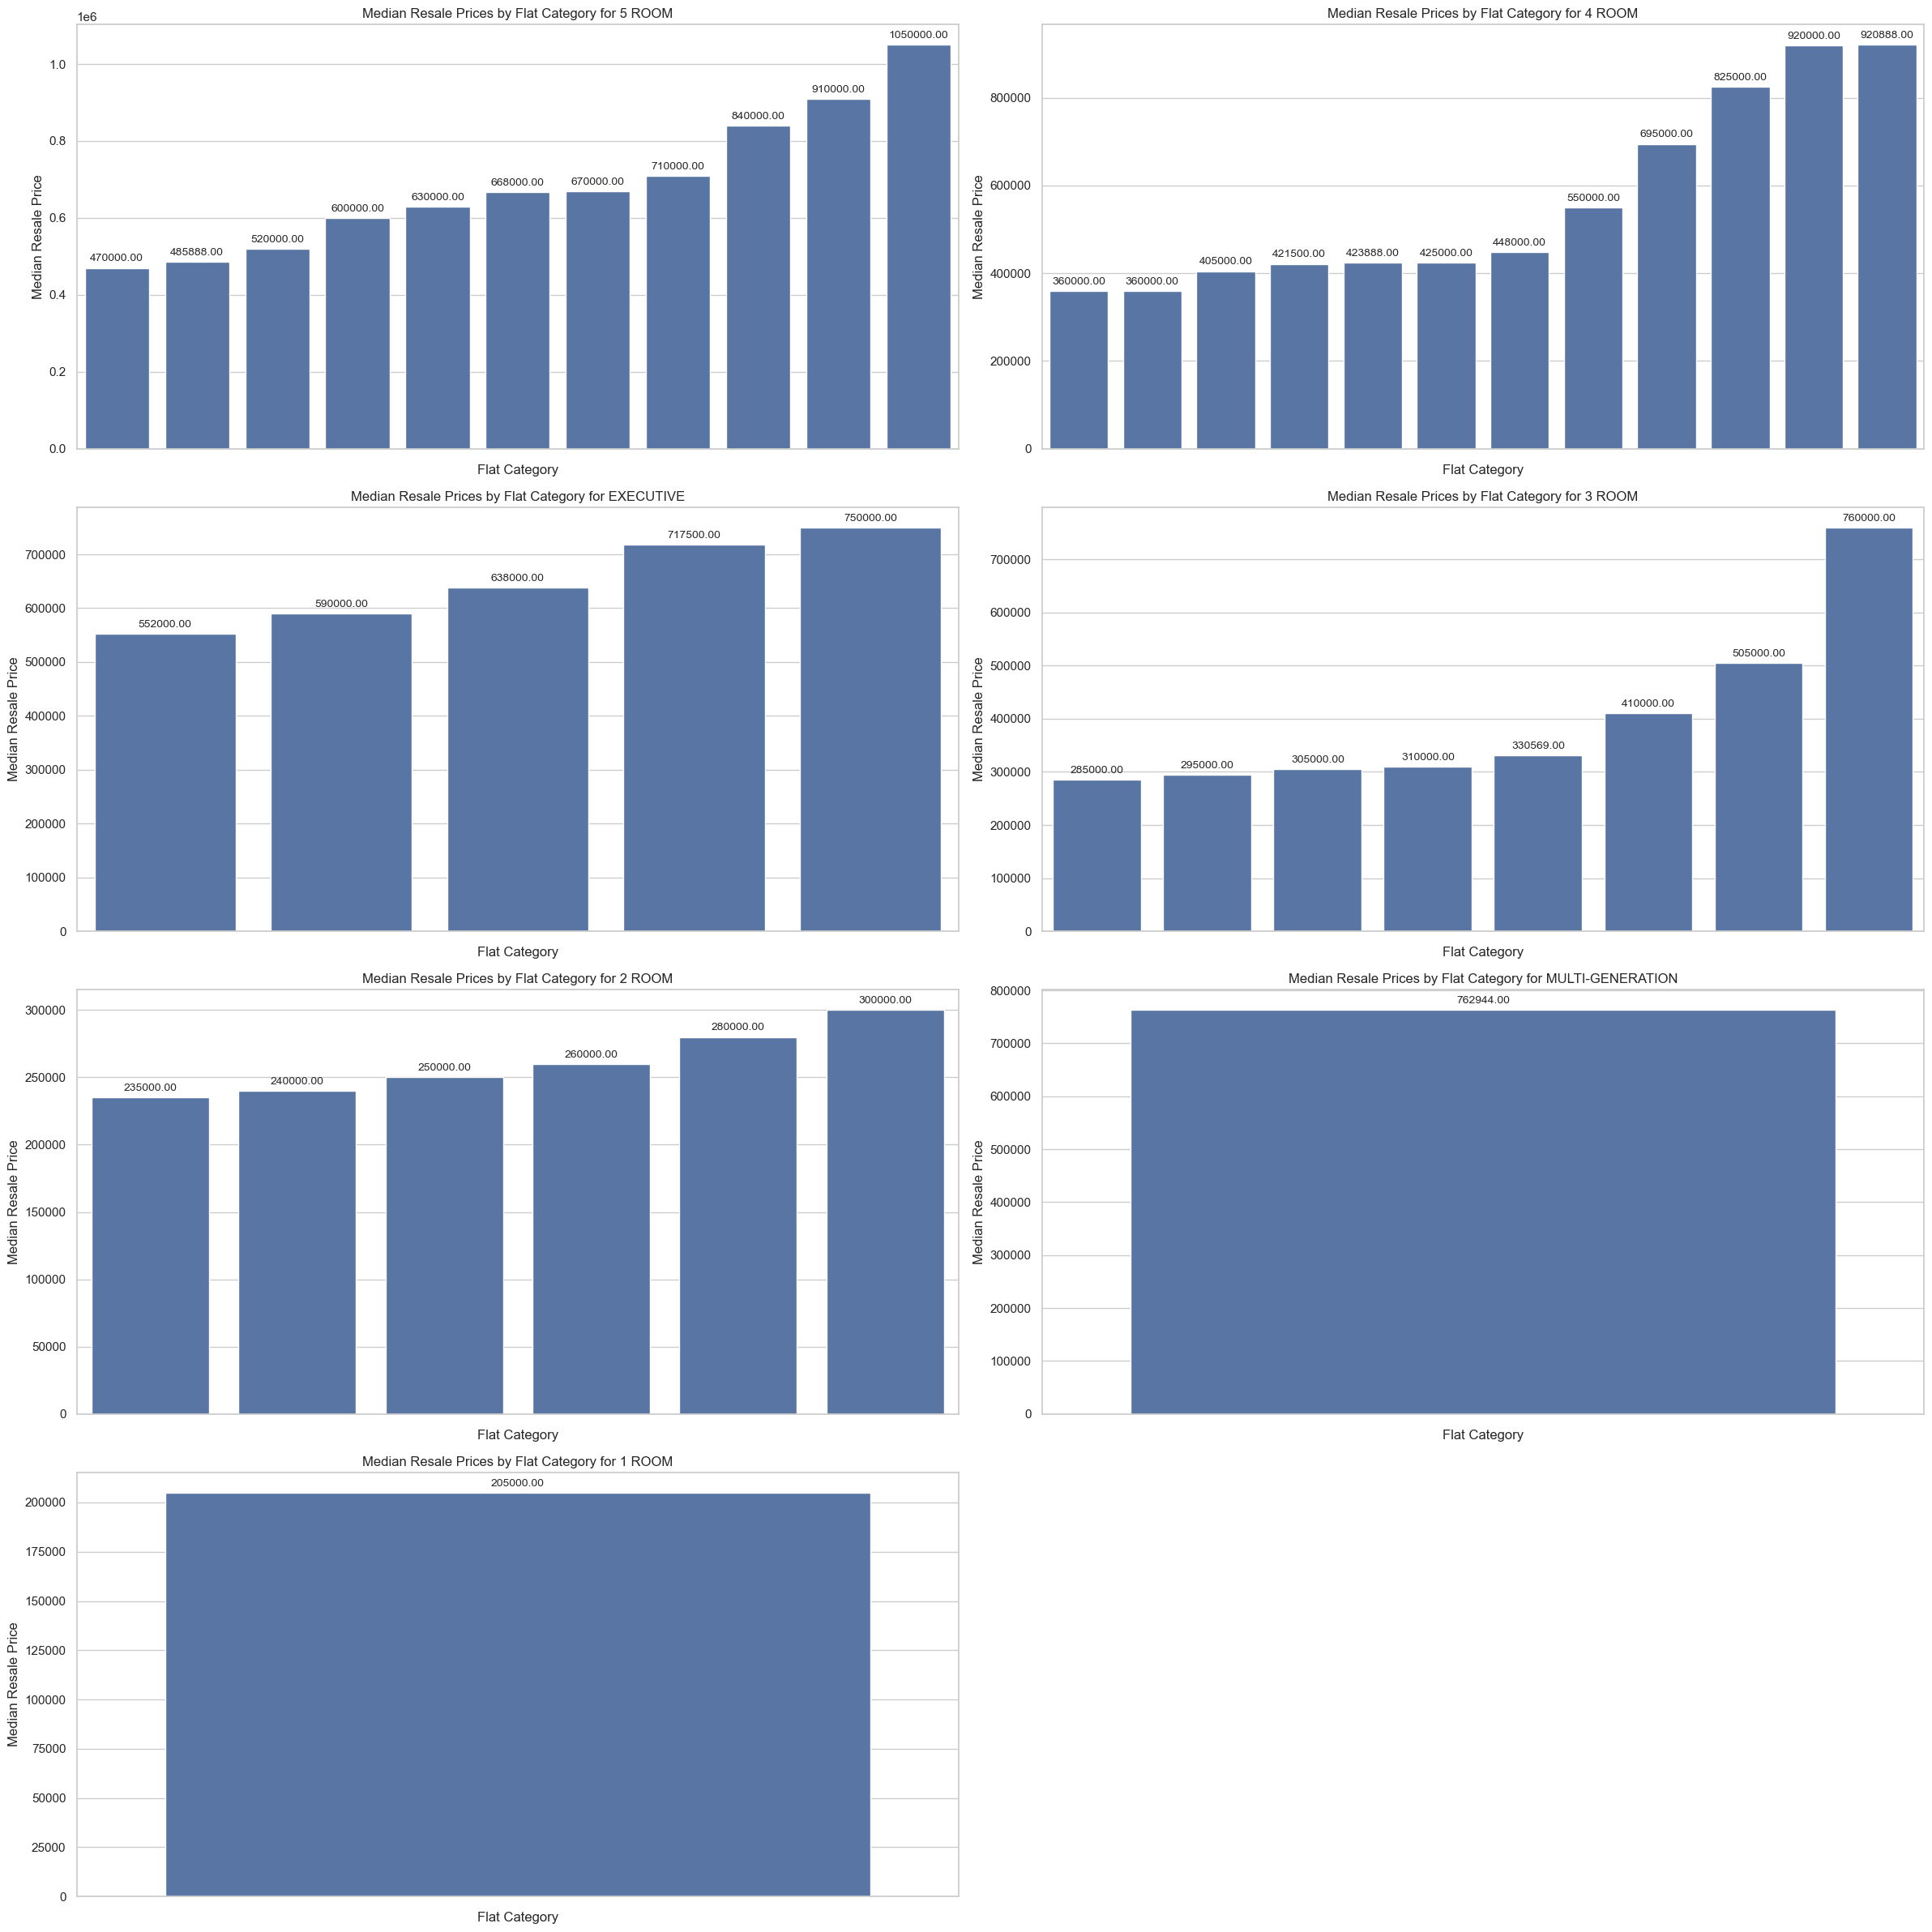

In [38]:
# Finding the median resale prices across flat models for each flat type
unique_flat_types = data_hdb_last15['flat_type'].unique()

num_plots = 7
num_cols = 2
num_rows = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12*num_cols, 6*num_rows))

for i, flat_type in enumerate(unique_flat_types):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_plots > 1 else axes
    filtered_data = data_hdb_last15[data_hdb_last15['flat_type'] == flat_type]
    median_resale_prices = filtered_data.groupby('flat_category')['resale_price'].median().reset_index().sort_values(by='resale_price')
    plot = sns.barplot(x='flat_category', y='resale_price', data=median_resale_prices, ax=ax) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Median Resale Prices by Flat Category for {flat_type}')
    ax.set_xlabel('Flat Category') 
    ax.set_ylabel('Median Resale Price')

    for bar in plot.patches:
        plot.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')

for ax in axes.flatten()[len(unique_flat_types):]:
    ax.axis('off')
    
plt.tight_layout()
plt.show()


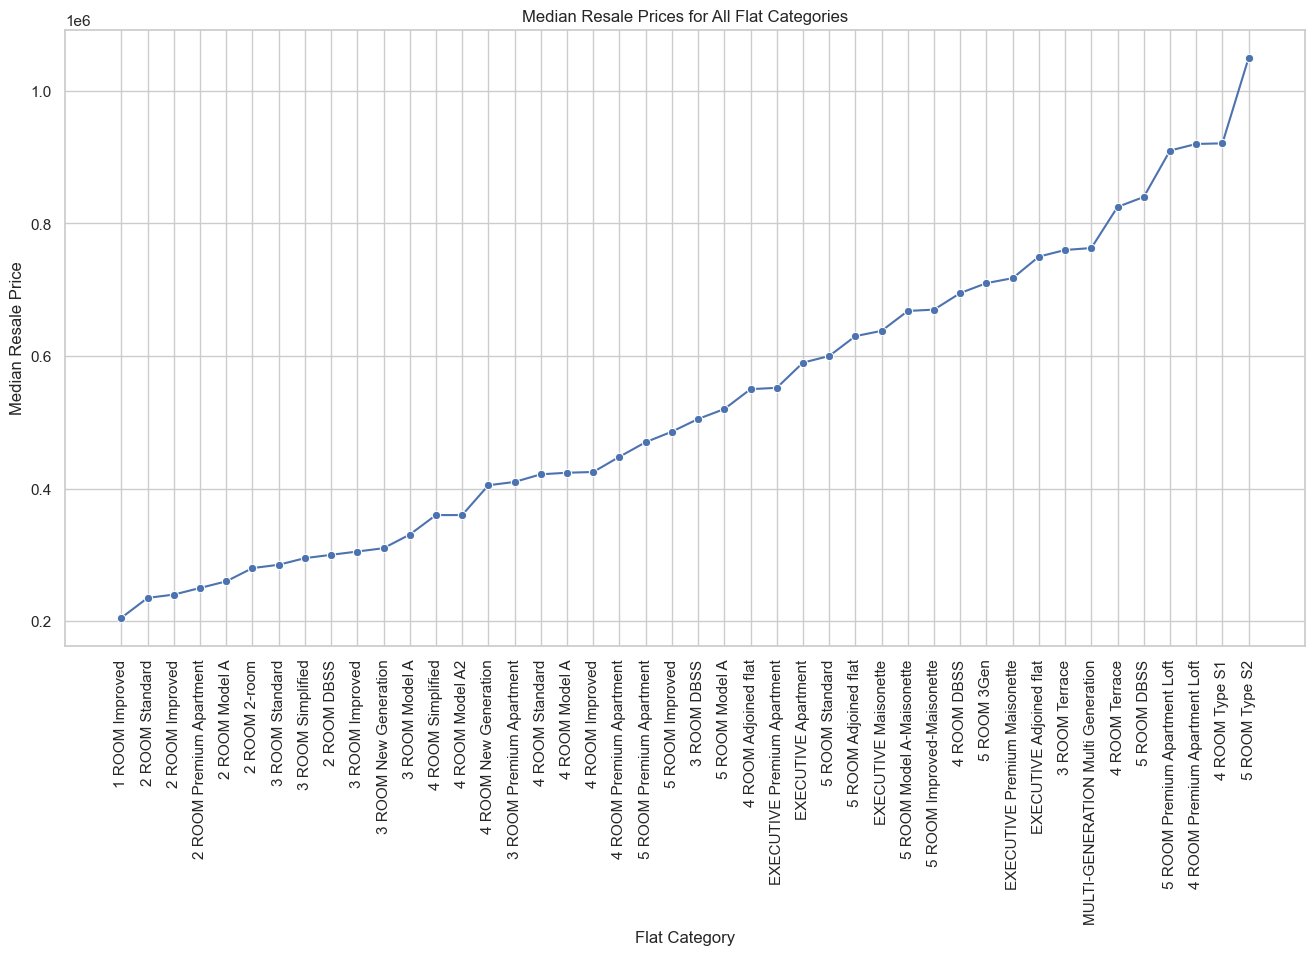

In [39]:
# Finding the median resale prices across all flat categories
median_resale_prices_all = data_hdb_last15.groupby(['flat_category'])['resale_price'].median().reset_index()
median_resale_prices_all = median_resale_prices_all.sort_values(by='resale_price')

# plot the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(x='flat_category', y='resale_price', data=median_resale_prices_all, marker='o')  
plt.xticks(rotation=90) 
plt.title('Median Resale Prices for All Flat Categories')  
plt.xlabel('Flat Category')  
plt.ylabel('Median Resale Price')  
plt.show()

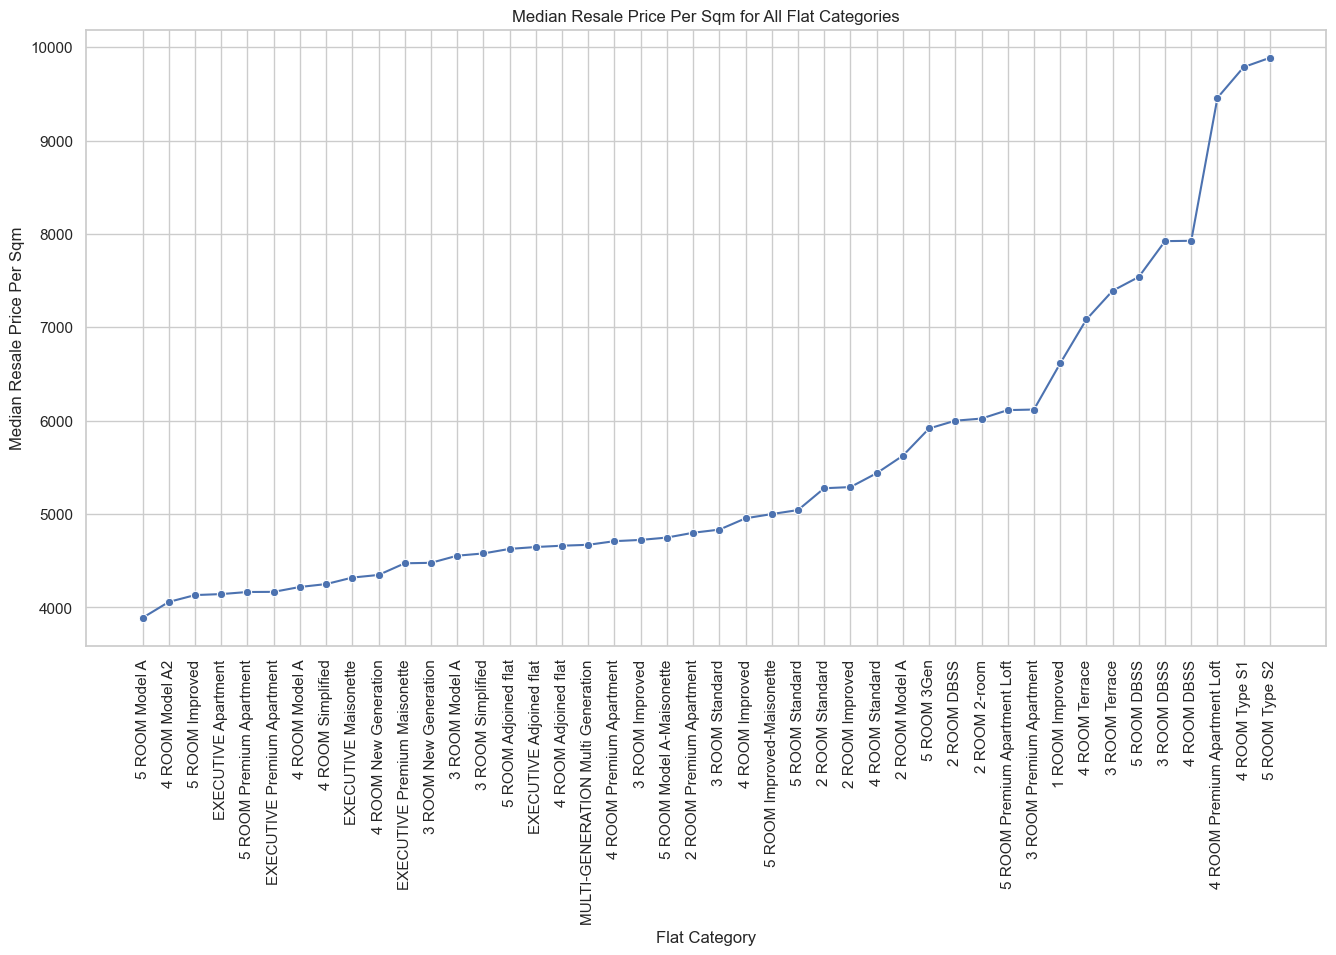

In [40]:
# Finding median resale price per sqm across all flat categories
data_hdb_last15['price_per_sqm'] = data_hdb_last15['resale_price'] / data_hdb_last15['floor_area_sqm']
median_pps_flat_cat = data_hdb_last15.groupby(['flat_category'])['price_per_sqm'].median().reset_index()
median_pps_flat_cat = median_pps_flat_cat.sort_values(by='price_per_sqm')

# plot the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(x='flat_category', y='price_per_sqm', data=median_pps_flat_cat, marker='o')  
plt.xticks(rotation=90) 
plt.title('Median Resale Price Per Sqm for All Flat Categories')  
plt.xlabel('Flat Category')  
plt.ylabel('Median Resale Price Per Sqm')  
plt.show()

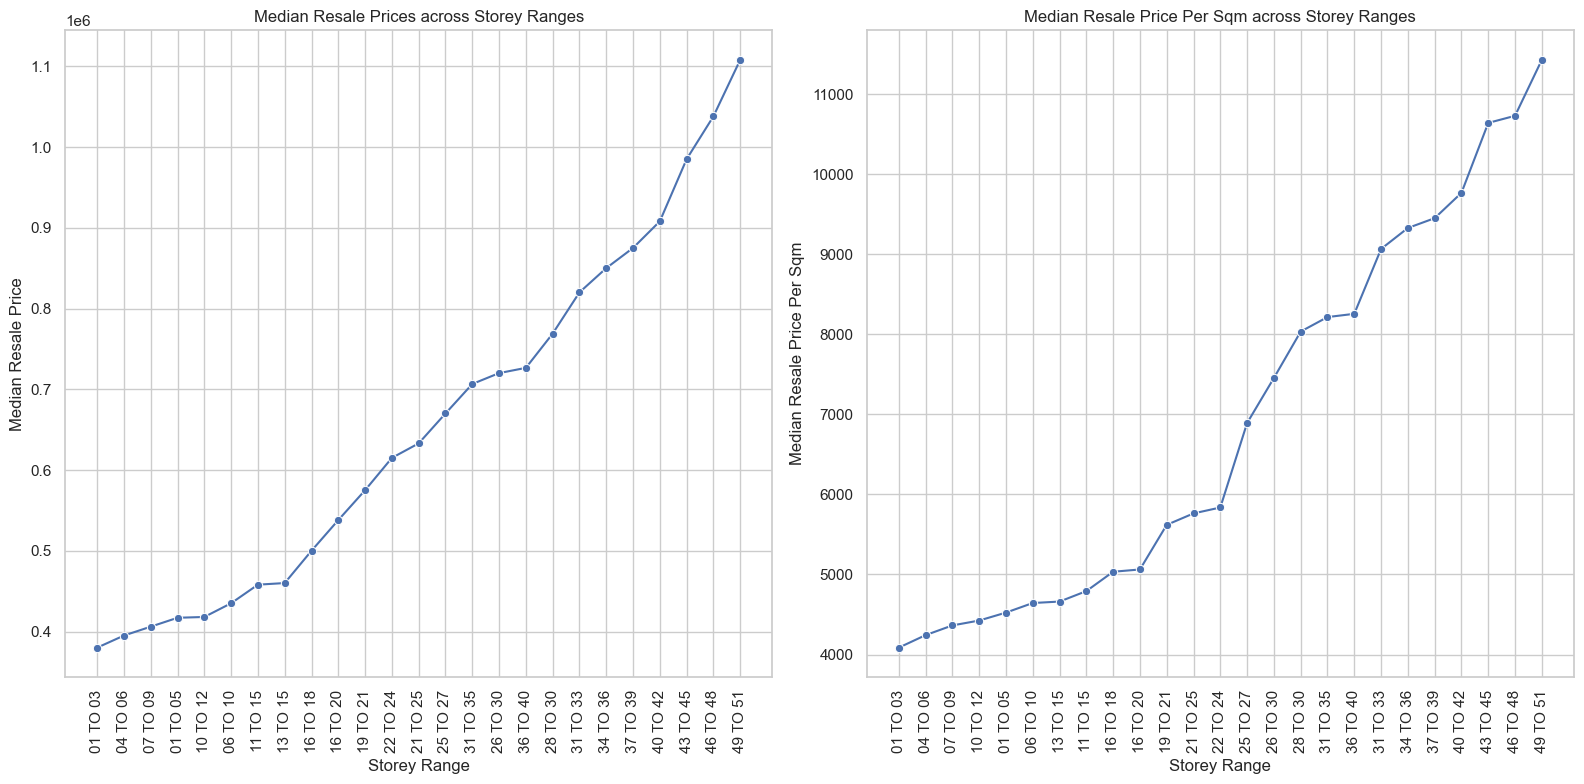

In [41]:
# Finding median resale prices across all storey range
median_resale_prices_storey = data_hdb_last15.groupby(['storey_range'])['resale_price'].median().reset_index()
median_resale_prices_storey = median_resale_prices_storey.sort_values(by='resale_price')

# Finding median resale price per sqm across all storey range
median_pps_storey = data_hdb_last15.groupby(['storey_range'])['price_per_sqm'].median().reset_index()
median_pps_storey = median_pps_storey.sort_values(by='price_per_sqm')

# Create a figure with two subplots arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first aggregated data on the first subplot
sns.lineplot(x='storey_range', y='resale_price', data=median_resale_prices_storey, marker='o', ax=axes[0])  
axes[0].set_title('Median Resale Prices across Storey Ranges')  
axes[0].set_xlabel('Storey Range')  
axes[0].set_ylabel('Median Resale Price')  
axes[0].tick_params(axis='x', rotation=90)

# Plot the second aggregated data on the second subplot
sns.lineplot(x='storey_range', y='price_per_sqm', data=median_pps_storey, marker='o', ax=axes[1])  
axes[1].set_title('Median Resale Price Per Sqm across Storey Ranges')  
axes[1].set_xlabel('Storey Range')  
axes[1].set_ylabel('Median Resale Price Per Sqm')  
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

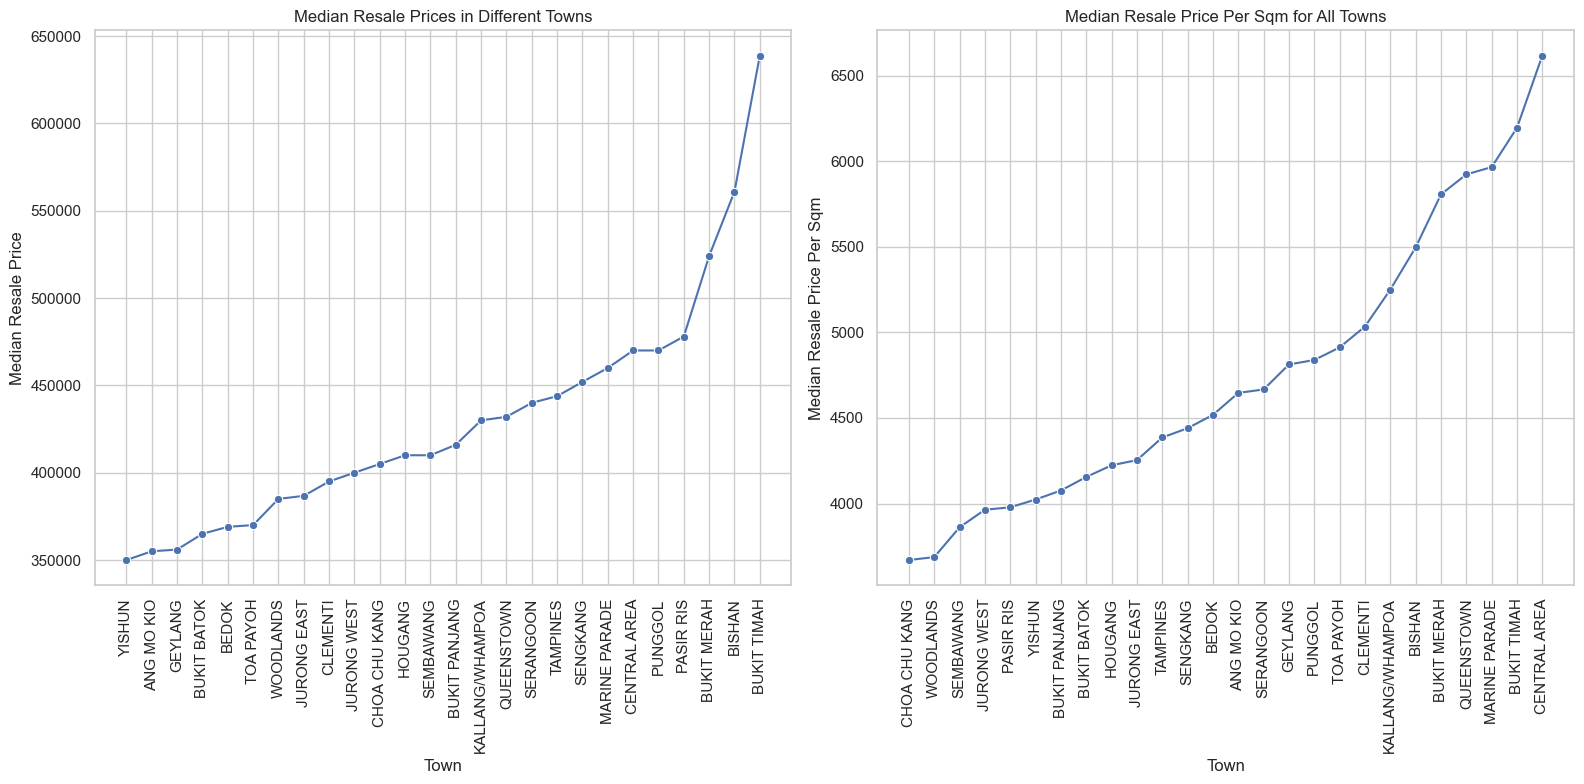

In [42]:
# Finding median resale prices across all towns
median_resale_prices_town = data_hdb_last15.groupby(['town'])['resale_price'].median().reset_index()
median_resale_prices_town = median_resale_prices_town.sort_values(by='resale_price')

# Finding median resale price per sqm across all towns
median_pps_town = data_hdb_last15.groupby(['town'])['price_per_sqm'].median().reset_index()
median_pps_town = median_pps_town.sort_values(by='price_per_sqm')

# Create a figure with two subplots arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first aggregated data on the first subplot
sns.lineplot(x='town', y='resale_price', data=median_resale_prices_town, marker='o', ax=axes[0])  
axes[0].set_title('Median Resale Prices in Different Towns')  
axes[0].set_xlabel('Town')  
axes[0].set_ylabel('Median Resale Price')  
axes[0].tick_params(axis='x', rotation=90)

# Plot the second aggregated data on the second subplot
sns.lineplot(x='town', y='price_per_sqm', data=median_pps_town, marker='o', ax=axes[1])  
axes[1].set_title('Median Resale Price Per Sqm for All Towns')  
axes[1].set_xlabel('Town')  
axes[1].set_ylabel('Median Resale Price Per Sqm')  
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

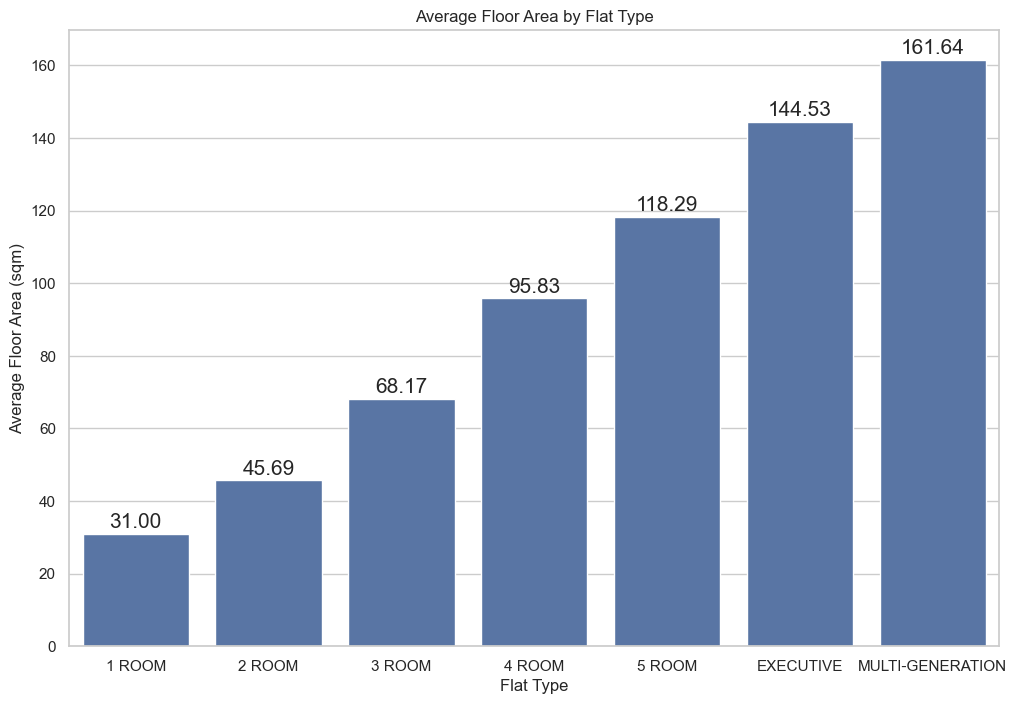

In [43]:
# calculate avg floor area for each flat_type
average_floor_area = data_hdb_last15.groupby('flat_type')['floor_area_sqm'].mean().reset_index()

# size
plt.figure(figsize=(12, 8))

# plot
plot = sns.barplot(x='flat_type', y='floor_area_sqm', data=average_floor_area)
plt.title('Average Floor Area by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Floor Area (sqm)')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

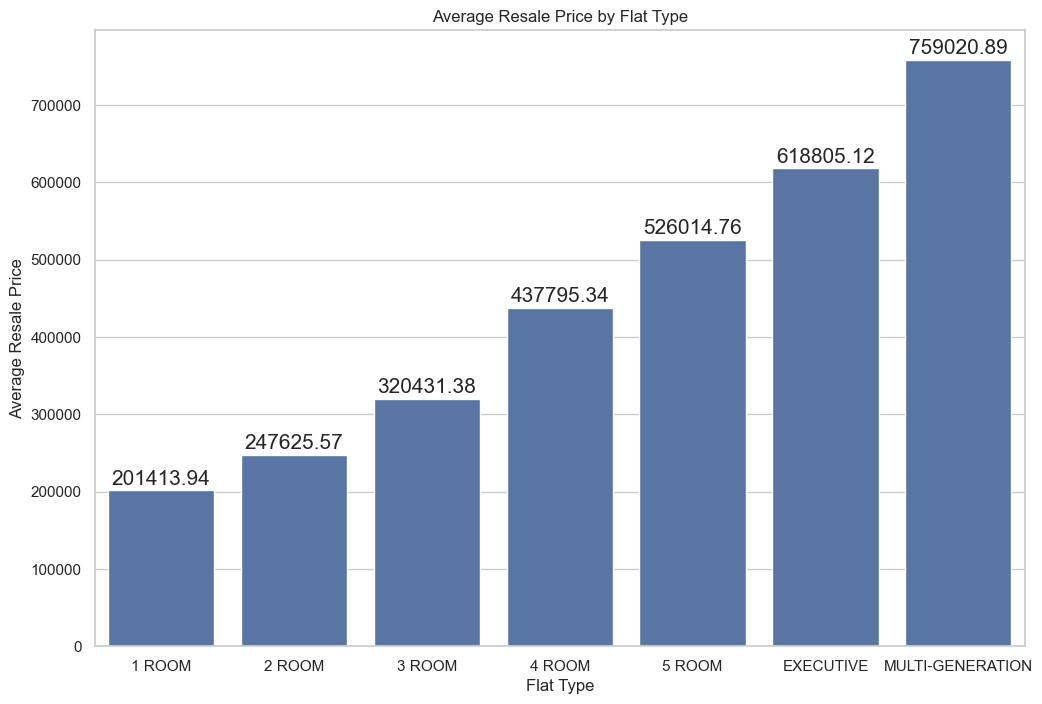

In [44]:
# calculate avg price for each flat_type
average_price = data_hdb_last15.groupby('flat_type')['resale_price'].mean().reset_index()

# size
plt.figure(figsize=(12, 8))

# plot
plot = sns.barplot(x='flat_type', y='resale_price', data=average_price)
plt.title('Average Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')

for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

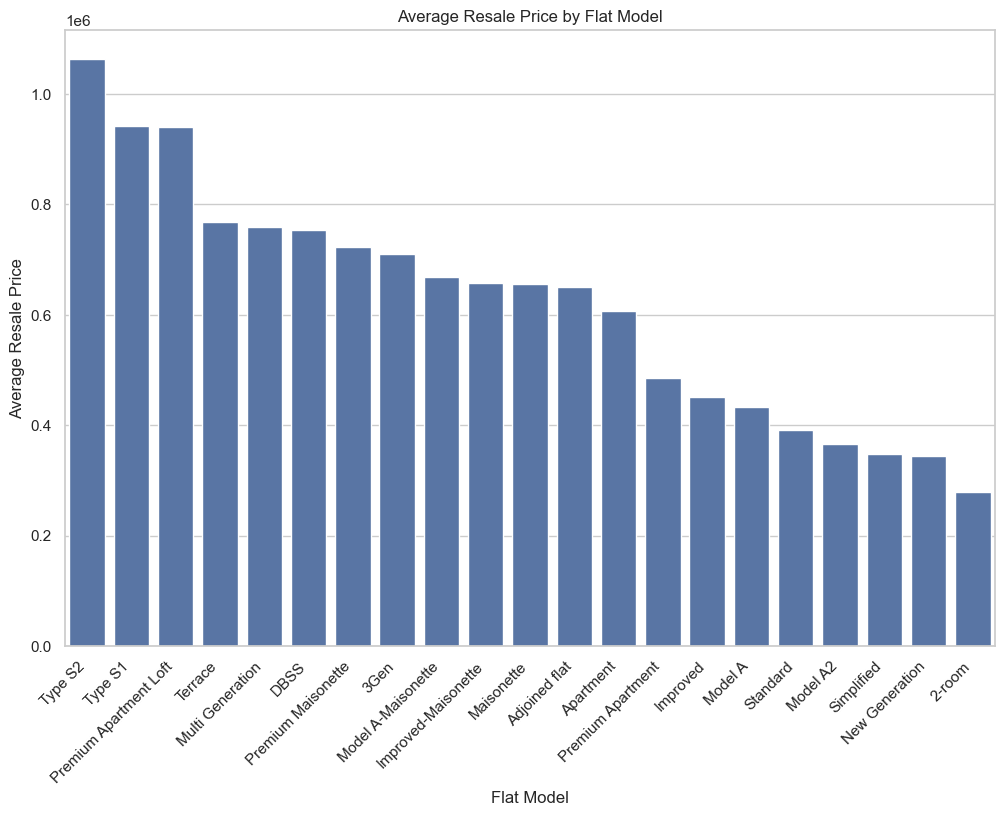

In [45]:
# calculate avg price for each flat_model
average_price = data_hdb_last15.groupby('flat_model')['resale_price'].mean().reset_index()

# sort
average_price = average_price.sort_values(by='resale_price', ascending=False)

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='flat_model', y='resale_price', data=average_price)
plt.title('Average Resale Price by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45, ha='right')

plt.show()

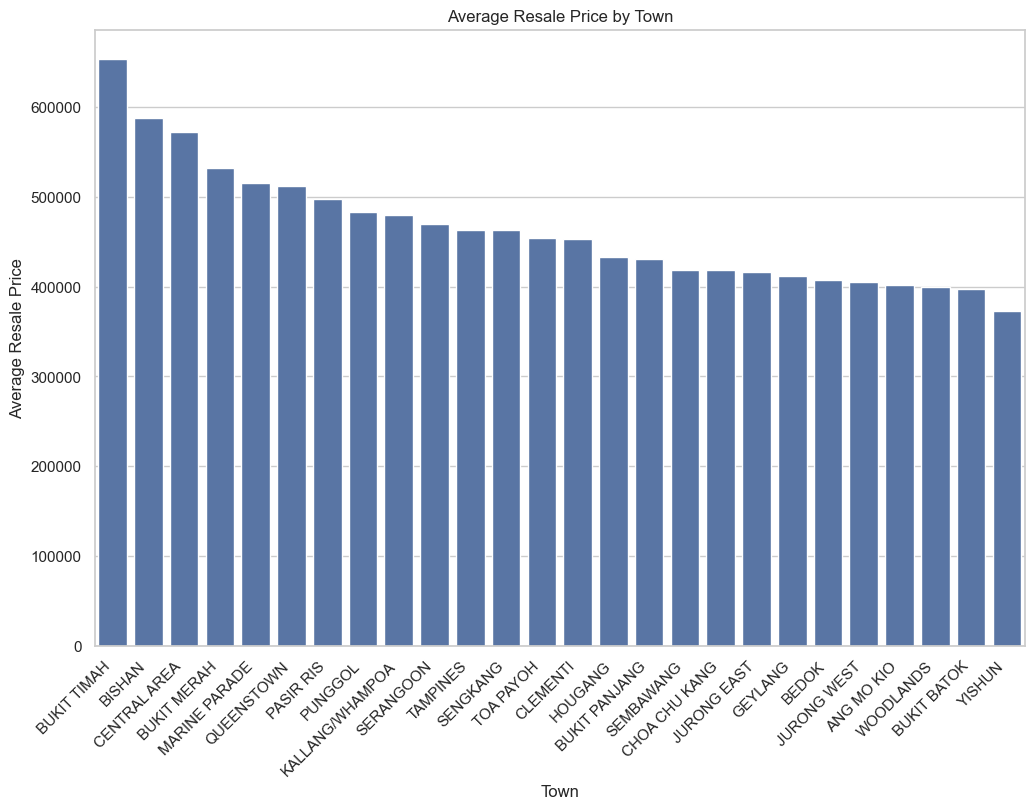

In [46]:
# calculate avg price for each town
average_price = data_hdb_last15.groupby('town')['resale_price'].mean().reset_index()

# sort
average_price = average_price.sort_values(by='resale_price', ascending=False)

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='town', y='resale_price', data=average_price)
plt.title('Average Resale Price by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

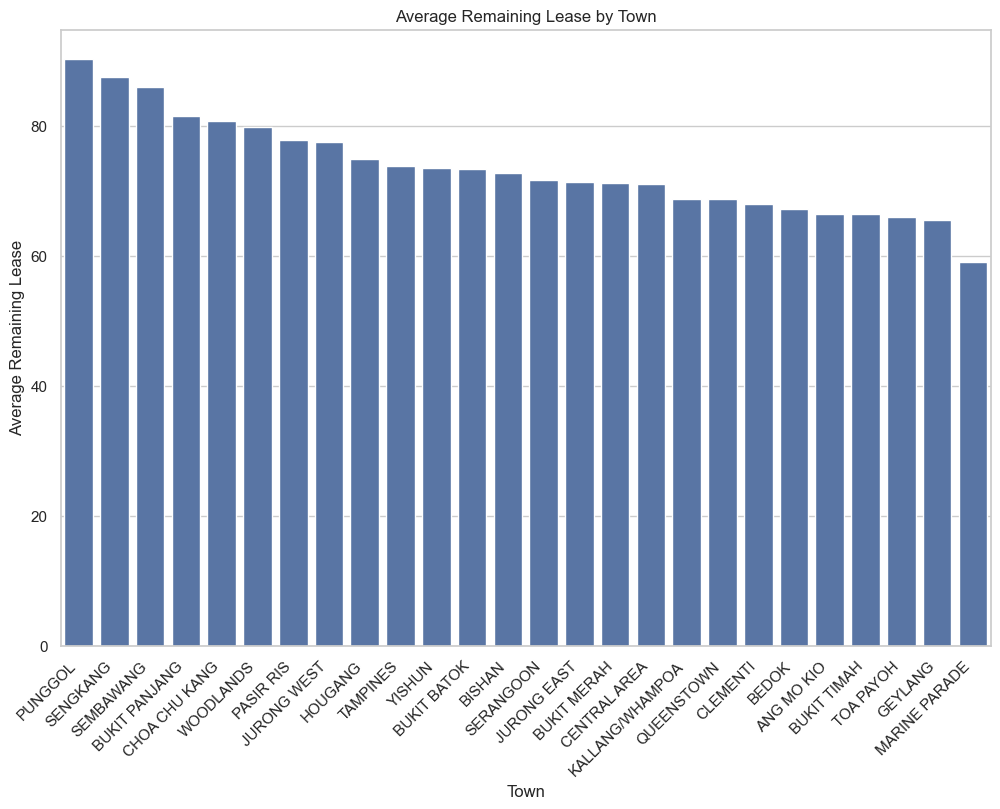

In [47]:
# calculate avg remaining lease for each town
average_remaining_lease = data_hdb_last15.groupby('town')['remaining_lease'].mean().reset_index()

# sort
average_remaining_lease = average_remaining_lease.sort_values(by='remaining_lease', ascending=False)

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='town', y='remaining_lease', data=average_remaining_lease)
plt.title('Average Remaining Lease by Town')
plt.xlabel('Town')
plt.ylabel('Average Remaining Lease')
plt.xticks(rotation=45, ha='right')
plt.show()

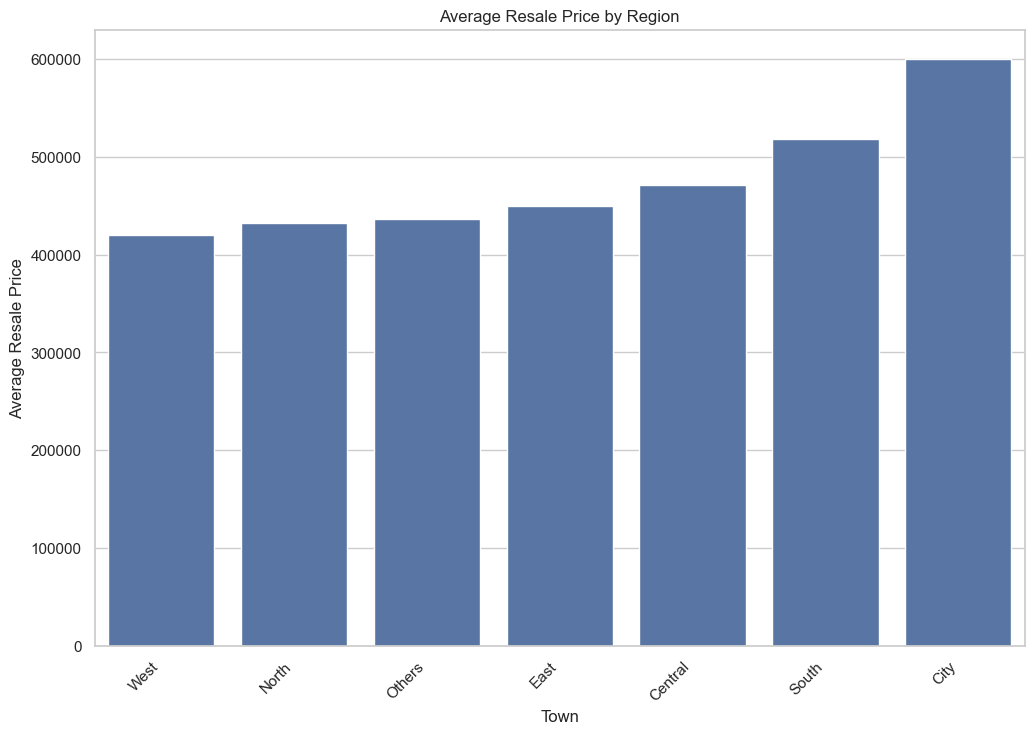

In [48]:
# calculate avg resale price by region
average_resale_price = data_hdb_last15.groupby('region')['resale_price'].mean().reset_index()

# sort
average_resale_price = average_resale_price.sort_values(by='resale_price')

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='region', y='resale_price', data=average_resale_price)
plt.title('Average Resale Price by Region')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

### Saving Dataset

In [50]:
# Save Cleaned Dataset
data_hdb_last15.to_csv('../dataset/hdb_last15_cleaned.csv', index = False)